In [17]:
import numpy as np
import matplotlib.pyplot as plt
import types
import pandas as pd

In [2]:
# %cd ../
import pyMelt as m
# %cd dev

In [3]:
m.__version__

'3.dev0'

In [4]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()

In [5]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

In [6]:
column = mantle.adiabaticMelt(1500.0, dP=-0.004)

/Users/sm905/repos/pyMelt/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


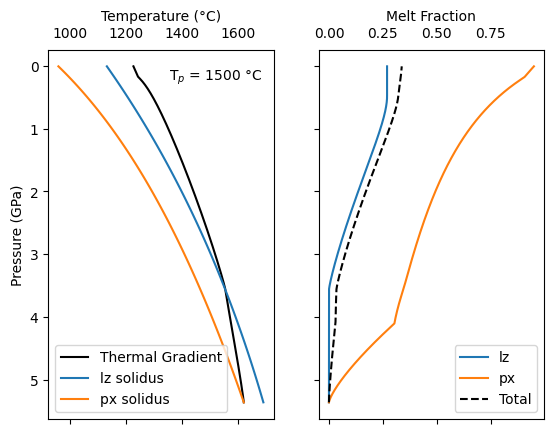

In [7]:
fig, ax = column.plot()

plt.show()

In [8]:
phasediag_klb1 = m.load_phaseDiagram('thermocalc_klb1')
phasediag_kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [9]:
column.calculateChemistry(elements={'lz': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    'px': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    },
                          method='phase_diagram_major',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1})

/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The MgO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')
/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The FeO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')


In [10]:
column.calculateMineralProportions(method='phase_diagram_major',
                                   phaseDiagram={'lz': phasediag_klb1,
                                                 'px': phasediag_kg1})

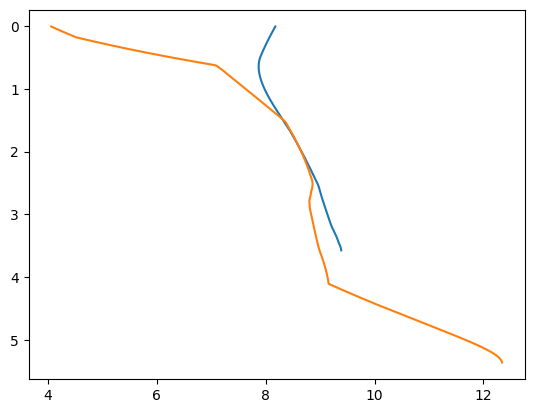

In [11]:
f, a = plt.subplots()

a.plot(column.composition['lz'].olv_FeO, column.composition['lz'].P)
a.plot(column.composition['px'].olv_FeO, column.composition['px'].P)

a.invert_yaxis()

plt.show()


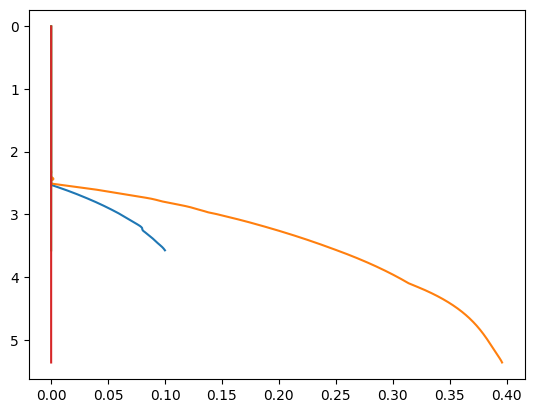

In [84]:
f, a = plt.subplots()

a.plot(column.composition['lz']['grt'], column.composition['lz'].P)
a.plot(column.composition['px']['grt'], column.composition['px'].P)

a.plot(column.composition['lz']['spn'], column.composition['lz'].P)
a.plot(column.composition['px']['spn'], column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [13]:
column.composition['lz']

,P,T,F,liq_MgO,olv_MgO,cpx_MgO,opx_MgO,grt_MgO,spn_MgO,plg_MgO,liq_FeO,olv_FeO,cpx_FeO,opx_FeO,grt_FeO,spn_FeO,plg_FeO
0,5.358143,1618.983090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0
1,5.354143,1618.883901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0
2,5.350143,1618.779676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0
3,5.346143,1618.672948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0
4,5.342143,1618.564346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.026143,1228.082604,0.269781,10.229977,50.454580,18.811673,30.996541,3.421187e-23,0.0,0.0,6.121745,8.169192,2.837718,4.871142,9.024257e-24,0.0,0.0
1334,0.022143,1227.685146,0.269781,10.204504,50.452535,18.805419,30.973015,3.541196e-23,0.0,0.0,6.108101,8.171728,2.836895,4.873185,9.340810e-24,0.0,0.0
1335,0.018143,1227.287524,0.269781,10.179067,50.450490,18.799649,30.949240,3.452215e-23,0.0,0.0,6.094452,8.174265,2.836741,4.875222,9.106099e-24,0.0,0.0
1336,0.014143,1226.889738,0.269781,10.153666,50.448445,18.794415,30.925211,3.124590e-23,0.0,0.0,6.080798,8.176802,2.837323,4.877253,8.241904e-24,0.0,0.0


By mass conservation:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} \delta_{ph}$

The definition of the fractionation factor:

$ \alpha = \frac{\delta_{min} + 10^3}{\delta_{melt} + 10^3} $

Rearranging:

$ \delta_{min} = \alpha (\delta_{melt} + 10^3) - 10^3 $

Substituting into the first expression:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} [ \alpha_{ph} (\delta_{melt} + 10^3) - 10^3] + x_{melt} c_{melt} \delta_{melt}$

This rearranges to:

$ \delta_{melt} = \frac{c_{bulk} \delta_{bulk} - 10^3 \left[ \sum x_{ph} c_{ph} \alpha_{ph} - \sum x_{ph} c_{ph} \right]}{ \sum x_{ph} c_{ph} \alpha_{ph} + x_{melt} c_{melt}} $


In [120]:
from pyMelt.core import InputError

def calculateStableIsotopes(self, species, fractionationFactors, isotopeRatioLabel, 
                            bulk=0.0, fractionalExtraction=False, parameter='delta', 
                            **kwargs):
    """
    Write some documentation here...

    Parameters
    ----------
    species: str 
        The species to calculate the stable isotope fractionation for. E.g., MgO.
        Must correspond to a species that has been calculated in the liquid and
        solid already.
    fractionationFactors : float or dict
        The mineral-liquid fractionation factors (1000 ln beta) for each mineral 
        in the calculation. The mineral name should be given as the key. A number, 
        or a function may be given as the value. Alternatively, a single value
        or function can be provided to describe the bulk solid-liquid fractionation
        factor.
    isotopeRatioLabel : str
        The label to be applied to the results, e.g., 'd57Fe'.
    bulk : float, default: 0
        The bulk isotope ratio, in the units of the calculation. If the calculation
        is simulating fractional melt extraction this number corresponds to the
        bulk value before melting.
    fractionalExtraction : bool, default: False
        Controls wether calculation assumes batch or fractional melting for the
        purposes of the isotope fractionation calculation.
    parameter : str, default: 'delta'
        How the results should be expressed. Only 'delta' is currently supported.
    """
    
    if isinstance(fractionationFactors, float):
        phases = None
        colnames = ['liq_' + isotopeRatioLabel, 'sol_' + isotopeRatioLabel]
    elif isinstance(fractionationFactors, dict):
        phases = list(fractionationFactors.keys())
        colnames = ['liq_' + isotopeRatioLabel]
        for ph in phases:
            colnames.append(ph + '_' + isotopeRatioLabel)
    else:
        raise InputError("fractionationFactors must be a dict or float.")

    for lith in self.mantle.names:

        results = np.full([np.shape(self.P)[0], len(phases) + 1], np.nan)
        
        for i, row in self.composition[lith].iterrows():

            if row['F'] > 1e-15:
                if phases is not None:
                    cliq = row['liq_' + species]
                    xliq = row['F']

                    # Assemble arrays for the summations:
                    x = np.zeros(len(fractionationFactors))
                    c = np.zeros(len(fractionationFactors))
                    a = np.zeros(len(fractionationFactors))
                    
                    for n in range(len(phases)):
                        x[n] = row[phases[n]] * (1.0-xliq)
                        c[n] = row[phases[n] + '_' + species]
                        if callable(fractionationFactors[phases[n]]):
                            a[n] = fractionationFactors[phases[n]](row)
                        else:
                            a[n] = fractionationFactors[phases[n]]
                    a = np.exp(a/1000)
                                        
                
                else:
                    raise InputError("Single fractionationFactor not yet supported.")

                if fractionalExtraction is False:

                    cbulk = np.sum(c * x) + cliq * xliq

                    delta_melt = (
                        (cbulk * (bulk/1e3 + 1) 
                        / (np.sum(x*c*a) + xliq * cliq)
                        - 1) *1e3
                    )
                    
                    results[i, 0] = delta_melt
                    results[i, 1:] = a * (delta_melt + 1e3) - 1e3

                else:
                    raise InputError("fractionalExtraction is not currently supported")

        constructdf = pd.DataFrame(results, columns=colnames)
        # Check if the element exists already:
        repeats = [value for value in colnames if value in self.composition[lith].columns]
        self.composition[lith].drop(repeats, inplace=True, axis=1)
        self.composition[lith] = pd.concat([self.composition[lith], constructdf], axis=1)
    


column.calculateStableIsotopes = types.MethodType(calculateStableIsotopes, column)



In [121]:
species = 'MgO'

def WangBetaEqn(T, P, a, b, c, d, e, f, g, h, i):
    return ((a + b*P + c*P**2) * 1e6 / T**2 + (d + e*P + f*P**2) * (1e6/T**2)**2 
            + (g + h*P + i*P**2) * (1e6/T**2)**3)

fractionationFactors = {'olv': WangBetaEqn(1473.15, 1.0, 2.076, 7.183e-2, -4.672e-4, 
                                           1.049e-1, -3.359e-3, 5.009e-5, -1.192e-2, 2.739e-4, -5.518e-6),
                        'cpx': WangBetaEqn(1473.15, 1.0, 2.246, 8.548e-2, -7.425e-4, 
                                           1.025e-1, -3.369e-3, 5.172e-5, -1.169e-2, 2.834e-4, -5.514e-6),
                        'opx': WangBetaEqn(1473.15, 1.0, 2.246, 6.206e-2, -0.733e-4, 
                                           0.675e-1, -0.141e-3, -8.619e-5, -0.817e-2, -0.657e-4, 8.825e-6),
                        'grt': WangBetaEqn(1473.15, 1.0, 1.302, 2.732-2, 1.784e-4, 
                                           0.492e-1, 1.266e-3, -4.067e-5, -0.554e-2, -1.482e-4, 3.787e-6),
                        'spn': WangBetaEqn(1473.15, 1.0, 3.058, 6.216e-2, -3.720e-4, 
                                           0.847e-1, -3.421e-3, 5.116e-5, -1.132e-2, 2.555e-4, -5.551e-6),}

olvVal = fractionationFactors['olv']
for ff in fractionationFactors:
    fractionationFactors[ff] = fractionationFactors[ff] - olvVal

fractionationFactors

{'olv': 0.0,
 'cpx': 0.08400987754851319,
 'opx': 0.0670626656393527,
 'grt': -0.06243481282005503,
 'spn': 0.44384180785840255}

In [122]:
for ff in fractionationFactors:
    print(np.exp(fractionationFactors[ff]/1000))

1.0
1.000084013406477
1.0000670649143901
0.9999375671361923
1.0004439403202077


In [123]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, fractionalExtraction=False, parameter='delta', )

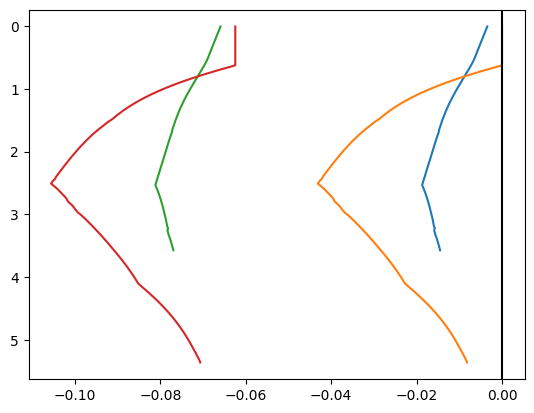

In [126]:
f, a = plt.subplots()

for ph in ['liq', 'grt']:# 'olv', 'cpx', 'opx', 'grt']:
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'])
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'])

a.invert_yaxis()

a.axvline(0, c='k')

plt.show()

In [15]:
for var in phasediag_klb1.variables:
    print(var)

pressure
temperature
X
cpx
cpx_Al2O3
cpx_CaO
cpx_Cr2O3
cpx_FeO
cpx_K2O
cpx_MgO
cpx_Na2O
cpx_SiO2
cpx_TiO2
cpx_xAlM1
cpx_xAlT
cpx_xCaM2
cpx_xCrM1
cpx_xFe3M1
cpx_xFeM1
cpx_xFeM2
cpx_xKM2
cpx_xMgM1
cpx_xMgM2
cpx_xNaM2
cpx_xSiT
cpx_xTiM1
liq
liq_Al2O3
liq_AlM
liq_CaM
liq_CaO
liq_Cr2O3
liq_FeO
liq_K2O
liq_MgO
liq_Na2O
liq_SiO2
liq_TiO2
liq_feM
liq_mgM
liq_pct
liq_pek
liq_phm
liq_pjd
liq_pkj
liq_pol
liq_pq
liq_psl
liq_pti
liq_pwo
liq_sumM
olv
olv_Al2O3
olv_CaO
olv_Cr2O3
olv_FeO
olv_K2O
olv_MgO
olv_Na2O
olv_SiO2
olv_TiO2
olv_xCaM2
olv_xFeM1
olv_xFeM2
olv_xMgM1
olv_xMgM2
opx
opx_Al2O3
opx_CaO
opx_Cr2O3
opx_FeO
opx_K2O
opx_MgO
opx_Na2O
opx_SiO2
opx_TiO2
opx_xAlM1
opx_xAlT
opx_xCaM2
opx_xCrM1
opx_xFe3M1
opx_xFeM1
opx_xFeM2
opx_xMgM1
opx_xMgM2
opx_xNaM2
opx_xSiT
opx_xTiM1
plg
plg_Al2O3
plg_CaO
plg_Cr2O3
plg_FeO
plg_K2O
plg_MgO
plg_Na2O
plg_SiO2
plg_TiO2
plg_x(Ca)
plg_x(K)
plg_x(Na)
spn
spn_Al2O3
spn_CaO
spn_Cr2O3
spn_FeO
spn_K2O
spn_MgO
spn_Na2O
spn_SiO2
spn_TiO2
spn_xAlM
spn_xAlT
spn_xCrM
spn_xF